In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import f1_score

In [31]:
FILE1 = "gender_submission.csv"
FILE2 = "test.csv"
FILE3 = "train.csv"

In [32]:
#Read in files
df1 = pd.read_csv(FILE1)
df2 = pd.read_csv(FILE2)
df3 = pd.read_csv(FILE3)

In [33]:
df1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [34]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
#Drop variables that do not work with decision tree in training set
df3 = df3.drop("Name", axis=1)
df3 = df3.drop("PassengerId", axis=1)
df3 = df3.drop("Ticket", axis=1)
df3 = df3.drop("Cabin", axis=1)
df3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [37]:
#Drop varaibles from testing set
df2 = df2.drop("Name", axis=1)
df2 = df2.drop("PassengerId", axis=1)
df2 = df2.drop("Ticket", axis=1)
df2 = df2.drop("Cabin", axis=1)
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [38]:
#Save the results from the training set and remove from df3
YTrain = df3[['Survived']]
df3 = df3.drop("Survived", axis=1)
YTrain.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [39]:
#Repeat for testing set
#Save the results from the training set and remove from df3
YTest = df1[['Survived']]
YTest.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [40]:
#Convert string variables to integers
df3.Sex[df3.Sex == 'male'] = 1
df3.Sex[df3.Sex == 'female'] = 0
df3['Embarked'] = df3['Embarked'].fillna(0) #fills missing values
df3.Embarked[df3.Embarked == 'S'] = 1
df3.Embarked[df3.Embarked == 'C'] = 2
df3.Embarked[df3.Embarked == 'Q'] = 3
df3['Age'] = df3['Age'].fillna(0) #fills missing values
df3.head()

C:\Users\Stephanie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Stephanie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Stephanie\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,1
1,1,0,38.0,1,0,71.2833,2
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,1


In [41]:
#Repeat for testing set
df2.Sex[df2.Sex == 'male'] = 1
df2.Sex[df2.Sex == 'female'] = 0
df2['Embarked'] = df2['Embarked'].fillna(0) #fills missing values
df2.Embarked[df2.Embarked == 'S'] = 1
df2.Embarked[df2.Embarked == 'C'] = 2
df2.Embarked[df2.Embarked == 'Q'] = 3
df2['Age'] = df2['Age'].fillna(0) #fills missing values
df2['Fare'] = df2['Fare'].fillna(0)
df2.head()

C:\Users\Stephanie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Stephanie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Stephanie\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


In [42]:
#After trying a few different depths, 3 was the most accurate
clf = DecisionTreeClassifier(max_depth=3).fit(df3, YTrain)

In [43]:
#Accuracy
YTest_Predicted = clf.predict(df2)


In [44]:
f1 = f1_score(YTest, YTest_Predicted, average=None)

In [45]:
f1

array([0.98884758, 0.97986577])

In [46]:
accuracy = clf.score(df2, YTest)
print(accuracy)

0.9856459330143541


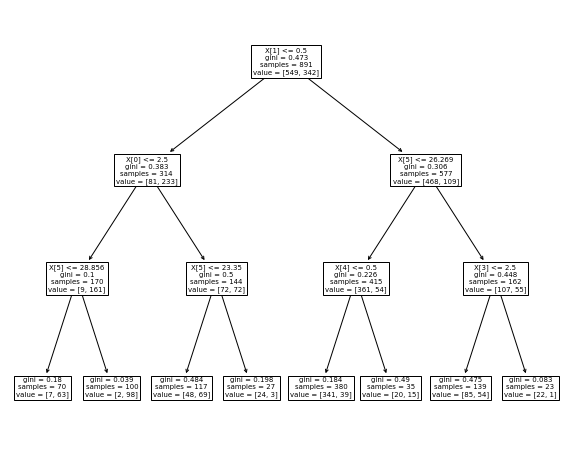

In [47]:
fig = plt.figure(figsize=(10, 8))
plot_tree(clf)
plt.show()